In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data=pd.read_csv("hr_dataset.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df=data.drop(columns=['Over18','StandardHours','EmployeeCount','BusinessTravel','DailyRate','MonthlyRate','HourlyRate','EmployeeNumber'])

In [6]:
df1=df.copy()

In [7]:
df1['Attrition'] = df1['Attrition'].apply(lambda x: 1 if x=='No' else 2)
df1['Gender'] = df1['Gender'].apply(lambda x: 1 if x=='Male' else 2)
df1['OverTime'] = df1['OverTime'].apply(lambda x: 2 if x=='No' else 1)
#Marital Status
MaritalStatus_map = {'Single':1, 'Married':2, 'Divorced':3}
df1['MaritalStatus'] = df1['MaritalStatus'].map(MaritalStatus_map)
#Education Field
EducationField_map = {'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,
                     'Human Resources':5, 'Other':6}
df1['EducationField'] = df1['EducationField'].map(EducationField_map)
#Job Role
JobRole_map = {'Sales Executive':1,'Sales Representative':2,'Laboratory Technician':3,'Manufacturing Director':4,
              'Healthcare Representative':5,'Manager':6,'Research Scientist':7,'Research Director':8,'Human Resources':9}
df1['JobRole'] = df1['JobRole'].map(JobRole_map)
#Department
Department_map = {'Sales':1, 'Research & Development':2, 'Human Resources':3}
df1['Department'] = df1['Department'].map(Department_map)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   Department                1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EducationField            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   Gender                    1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobRole                   1470 non-null   int64
 11  JobSatisfaction           1470 non-null   int64
 12  MaritalStatus             1470 non-null   int64
 13  MonthlyIncome             1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

In [8]:
df1.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1,1,2,1,2,2,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,2,8,1,1,3,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,2,2,6,4,1,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,2,3,4,1,4,2,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,2,1,2,1,1,3,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
y=df1['Attrition']
X=df1.drop('Attrition',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
start=time.time()
forest.fit(X_train, y_train)
stop=time.time()
print(f"Training time: {stop - start}s")

Training time: 0.13738203048706055s


In [43]:
forest.score(X_train, y_train)
forest.predict(X_test)

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
forest.predict_proba(X_test)[0:10]
y_pred = forest.predict(X_test)
pd.crosstab(y_test, y_pred1, rownames=['Actual Attrition'], colnames=['Predicted Attrition'])

Predicted Attrition,1,2
Actual Attrition,,
1,242,3
2,38,11


In [48]:
df_temp=df1['Attrition']
df2=df1.drop('Attrition',axis=1)
df2.insert(loc=0, column='Attrition', value=df_temp)

In [49]:
importances = pd.DataFrame({'feature':df2.iloc[1:, 1:df2.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.088
Age,0.071
DistanceFromHome,0.062
YearsWithCurrManager,0.053
PercentSalaryHike,0.052
YearsAtCompany,0.048
JobRole,0.044
TotalWorkingYears,0.042
OverTime,0.040


In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13945578231292516
Mean Squared Error: 0.13945578231292516
Root Mean Squared Error: 0.3734377890799553


In [51]:
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.14 degrees.


In [52]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy, '%.')

Accuracy: 92.51700680272108 %.


precision:  0.8642857142857143
recall_score:  0.9877551020408163
f1_score:  0.921904761904762


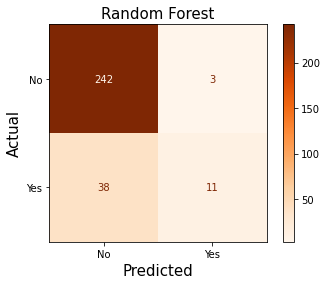

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ['No','Yes']
plot_confusion_matrix(forest, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('Random Forest', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))